In [23]:
import os
import glob
import torch
import numpy as np
import cv2

from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse


def imread(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)


def single_image_inference(model, img_tensor, save_path):
    # img_tensor: C x H x W, [0,1]
    model.feed_data(data={'lq': img_tensor.unsqueeze(dim=0)})

    if model.opt['val'].get('grids', False):
        model.grids()

    model.test()

    if model.opt['val'].get('grids', False):
        model.grids_inverse()

    visuals = model.get_current_visuals()
    sr_img = tensor2img([visuals['result']])
    imwrite(sr_img, save_path)


def batch_inference(
    model,
    input_dir,
    output_dir,
    exts=('.PNG','.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
):
    os.makedirs(output_dir, exist_ok=True)

    img_paths = []
    for ext in exts:
        img_paths.extend(glob.glob(os.path.join(input_dir, f'*{ext}')))

    print(f'Found {len(img_paths)} images in {input_dir}')

    with torch.no_grad():
        for idx, img_path in enumerate(img_paths):
            img_name = os.path.basename(img_path)
            save_path = os.path.join(output_dir, img_name)

            print(f'[{idx+1}/{len(img_paths)}] Processing: {img_name}')

            img_input = imread(img_path)
            inp_tensor = img2tensor(img_input)  # C x H x W

            single_image_inference(model, inp_tensor, save_path)

## ZeroDCE + NAFNet

In [24]:
opt_path = 'options/test/REDS/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

input_dir = '../../results/ZeroDCE'   
output_dir = '../../results/ZeroDCE_NAFNet'  

batch_inference(NAFNet, input_dir, output_dir)
print('All done.')

2025-12-11 06:56:21,733 INFO: Loading NAFNetLocal model from experiments/pretrained_models/NAFNet-REDS-width64.pth.
2025-12-11 06:56:21,926 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x7cebe008e6c0>
Found 169 images in ../../results/ZeroDCE
[1/169] Processing: img_1.PNG
[2/169] Processing: img_2.PNG
[3/169] Processing: img_3.PNG
[4/169] Processing: img_4.PNG
[5/169] Processing: img_5.PNG
[6/169] Processing: img_6.PNG
[7/169] Processing: img_7.PNG
[8/169] Processing: img_8.PNG
[9/169] Processing: img_9.PNG
[10/169] Processing: img_10.PNG
[11/169] Processing: img_11.PNG
[12/169] Processing: img_12.PNG
[13/169] Processing: img_13.PNG
[14/169] Processing: img_14.PNG
[15/169] Processing: img_15.PNG
[16/169] Processing: img_16.PNG
[17/169] Processing: img_17.PNG
[18/169] Processing: img_18.PNG
[19/169] Processing: img_19.PNG
[20/169] Processing: img_20.PNG
[21/169] Processing: img_21.PNG
[22/169] Processing: img_22.PNG
[23/169] Processing: img_23.PNG
[24/169] Processing: img_24.PNG
[25/169] Processing: img_25.PNG
[26/169] Processing: img_26.PNG
[27/169] Processing: img_27.PNG
[28/169] Processing: img_28.PNG
[29/169] 

## CALHE + NAFNet

In [25]:
input_dir = '../../results/CLAHE'   
output_dir = '../../results/CLAHE_NAFNet'  

batch_inference(NAFNet, input_dir, output_dir)
print('All done.')

Found 169 images in ../../results/CLAHE
[1/169] Processing: img_1.PNG
[2/169] Processing: img_2.PNG
[3/169] Processing: img_3.PNG
[4/169] Processing: img_4.PNG
[5/169] Processing: img_5.PNG
[6/169] Processing: img_6.PNG
[7/169] Processing: img_7.PNG
[8/169] Processing: img_8.PNG
[9/169] Processing: img_9.PNG
[10/169] Processing: img_10.PNG
[11/169] Processing: img_11.PNG
[12/169] Processing: img_12.PNG
[13/169] Processing: img_13.PNG
[14/169] Processing: img_14.PNG
[15/169] Processing: img_15.PNG
[16/169] Processing: img_16.PNG
[17/169] Processing: img_17.PNG
[18/169] Processing: img_18.PNG
[19/169] Processing: img_19.PNG
[20/169] Processing: img_20.PNG
[21/169] Processing: img_21.PNG
[22/169] Processing: img_22.PNG
[23/169] Processing: img_23.PNG
[24/169] Processing: img_24.PNG
[25/169] Processing: img_25.PNG
[26/169] Processing: img_26.PNG
[27/169] Processing: img_27.PNG
[28/169] Processing: img_28.PNG
[29/169] Processing: img_29.PNG
[30/169] Processing: img_30.PNG
[31/169] Processin

## Examples

In [3]:
import torch

from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import numpy as np
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)

In [4]:
opt_path = 'options/test/REDS/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

/mnt/intA-ssdr1-4tb/pearson/Projects/ECE253/Image_process/NAFNet/basicsr/models/base_model.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_net = torch.load(
2025-

 load net keys <built-in method keys of dict object at 0x7cec06a69540>


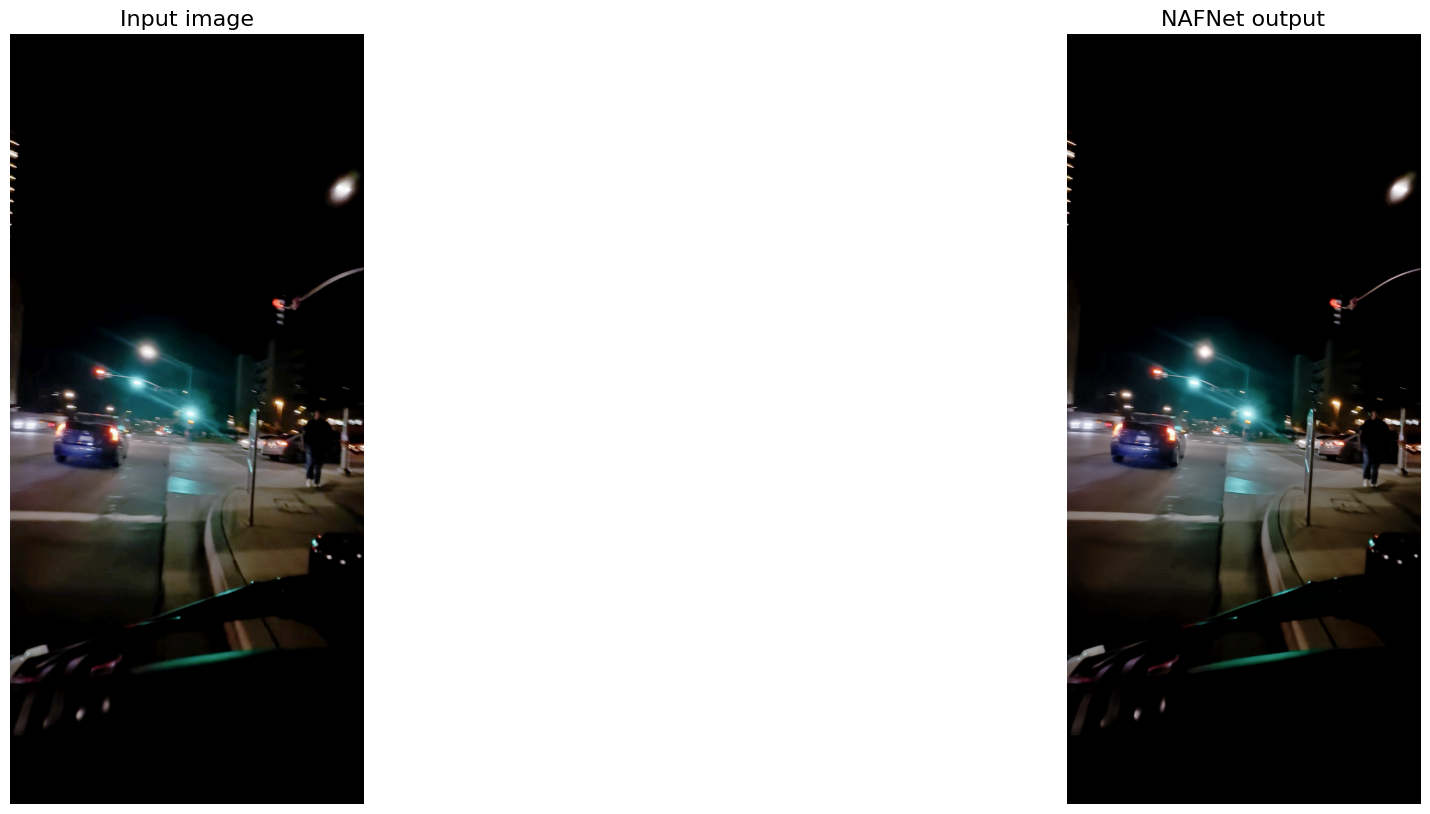

In [10]:
input_path = '/home/pearson/Projects/ECE253/results/ZeroDCE/img_137.PNG'
output_path = '/home/pearson/Projects/ECE253/results/1_color.png'

img_input = imread(input_path)
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = imread(output_path)
display(img_input, img_output)